# Contents
- Import Libraries and DF
    - boulder_data_clean_2
- Colored Correlation Matrix Heatmap
- Scatterplots
- Pairplot
- Categorical Plot
- Revist questions
- Hypothesis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures charts creatde are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
#import df
path = r'C:\Users\kesmc\Documents\2023 Bouldering Analysis'
boulder=pd.read_pickle(os.path.join(path, 'Data', 'boulder_data_clean_2.pkl'))

In [8]:
boulder.head()

,Competition Title,Competition Date,Full Name,Nation,Start Number,Rank,Gender,Qualification,Semifinal,Final
0,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Janja Garnbret,SLO,2,1,F,5.5,3.4,4.4
1,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Akiyo Noguchi,JPN,1,2,F,5.5,3.4,3.4
2,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Fanny Gibert,FRA,3,3,F,2.4,4.4,2.4
3,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Miho Nonaka,JPN,4,4,F,5.5,2.4,2.4
4,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Luce Douady,FRA,50,5,F,5.5,2.4,1.4


# Exploring relationships

## Correlations

In [9]:
# Create a correlation matrix using pandas
boulder.corr()

,Start Number,Rank,Qualification,Semifinal,Final
Start Number,1.000000,0.074084,0.001173,-0.131079,0.114376
Rank,0.074084,1.000000,-0.807543,-0.771585,-0.757259
Qualification,0.001173,-0.807543,1.000000,0.149588,0.424425
Semifinal,-0.131079,-0.771585,0.149588,1.000000,0.210478
Final,0.114376,-0.757259,0.424425,0.210478,1.000000


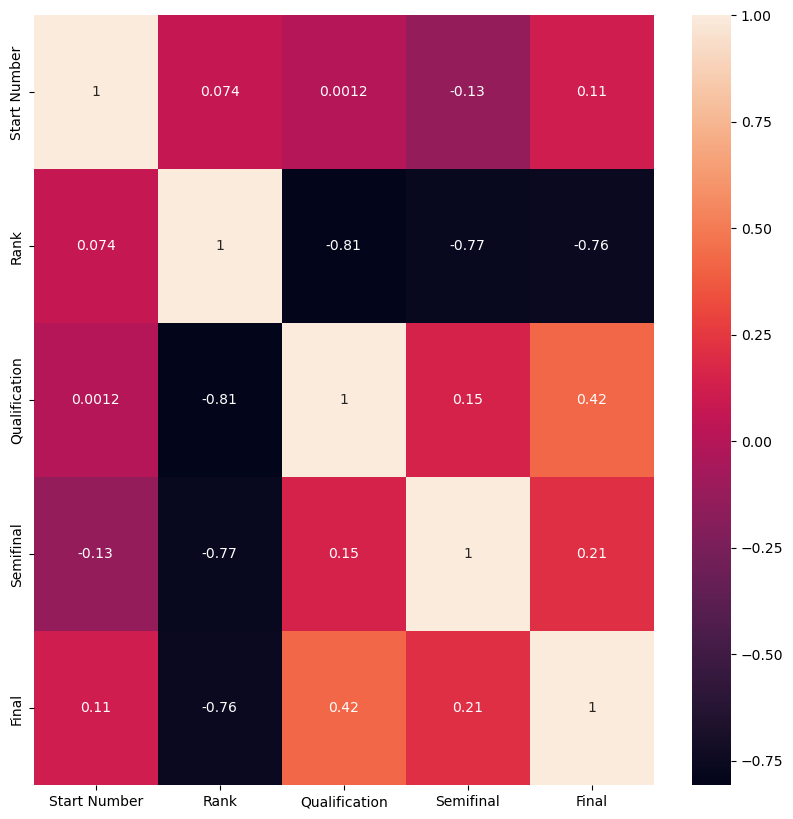

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(boulder.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

- The correlation between rank and results in qulaifications, semifinals, and finals is a given since rank is determined from them. 
- Start number has no correlation
- There is a weak correlation between semifinals and qualifications/finals, but a moderate correlation between qualification and final rounds

## Scatterplots

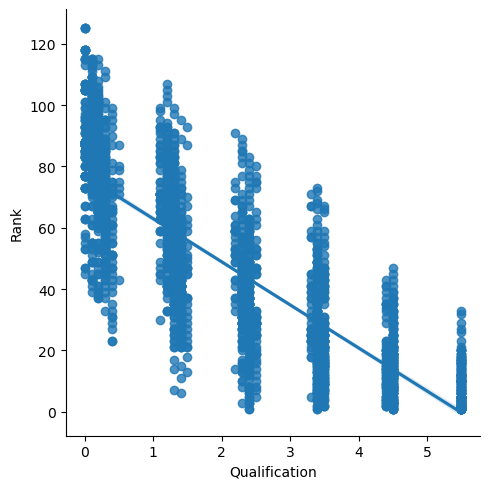

In [12]:
# I do find it interesting that rank is more closely correlated with Qualification rather than Final
# Create a scatterplot for the "Qualification" and "Rank" columns in seaborn
sns.lmplot(x = 'Qualification', y = 'Rank', data = boulder)

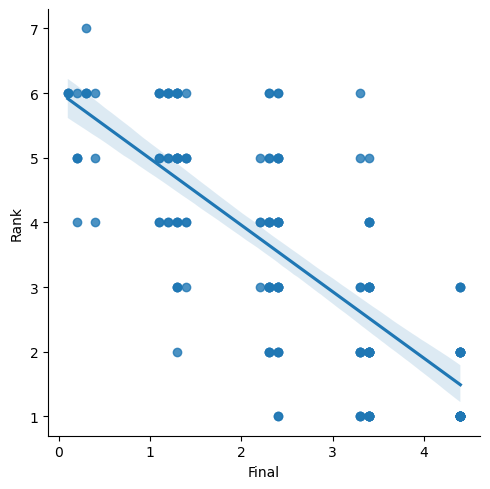

In [14]:
# Create a scatterplot for the "Final" and "Rank" columns in seaborn
sns.lmplot(x = 'Final', y = 'Rank', data = boulder)

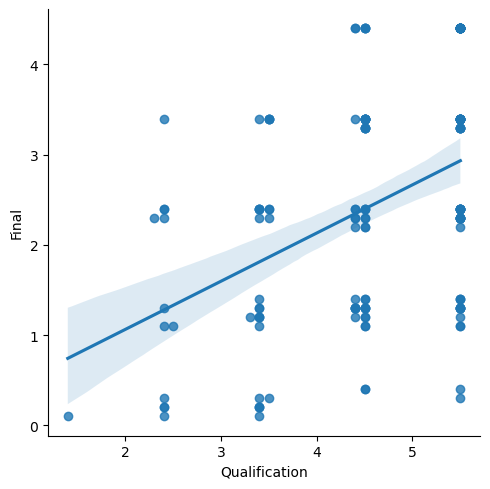

In [13]:
# Create a scatterplot for the "Qualification" and "Final" columns in seaborn
sns.lmplot(x = 'Qualification', y = 'Final', data = boulder)

The qualification and rank scatterplot allows us to visually see more clearly how the ranking tapers off on the ends of the spectrum. It reveals how inconsistent each competition can be, alwasy producing many outliers.

## Pair Plots

In [16]:
# Keep only the variables you want to use in the pair plot

sub=boulder[['Rank', 'Qualification', 'Semifinal', 'Final']]

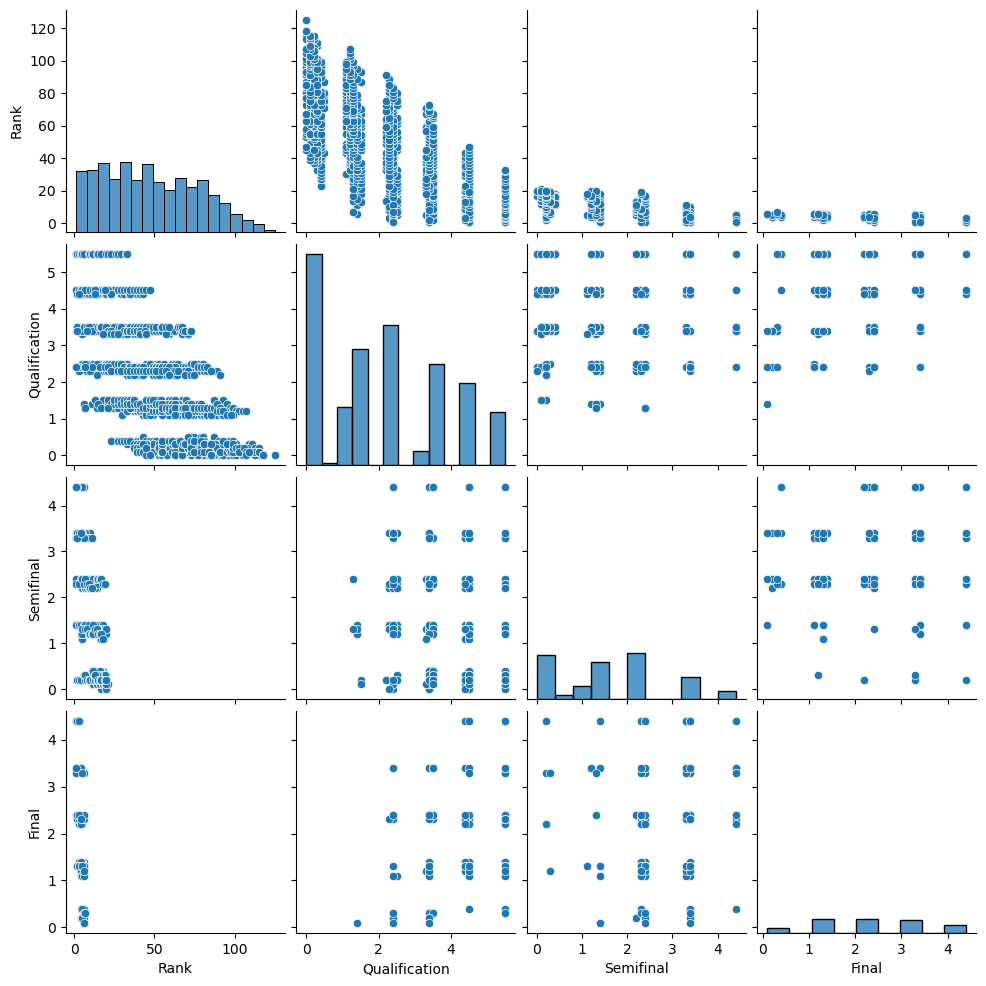

In [17]:
# Create a pair plot 

g = sns.pairplot(sub)

Rank and Qualification is the best visual

## Categorical Plot

<AxesSubplot:xlabel='Rank', ylabel='Count'>

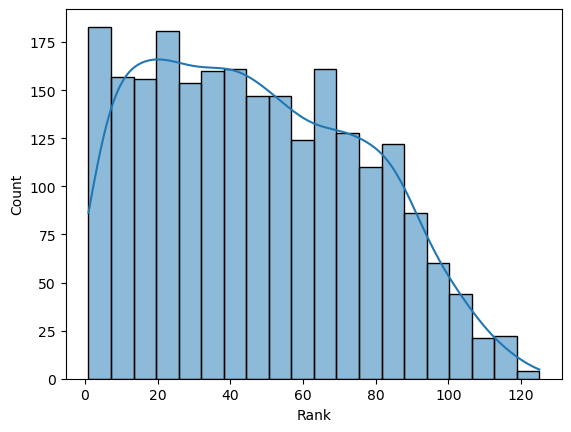

In [18]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution
sns.histplot(sub['Rank'], bins = 20, kde = True)

In [19]:
sub.loc[sub['Rank'] <= 25, 'Rank category'] = 'Highest Performers - Top 25'

C:\Users\kesmc\AppData\Local\Temp\ipykernel_15740\170542571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['Rank'] <= 25, 'Rank category'] = 'Highest Performers - Top 25'


In [21]:
sub.loc[(sub['Rank'] > 25) & (sub['Rank'] <= 50), 'Rank category'] = 'Above Average Performers'

In [23]:
sub.loc[(sub['Rank'] > 50) & (sub['Rank'] <= 75), 'Rank category'] = 'Average Performers'

In [24]:
sub.loc[sub['Rank'] > 75, 'Rank category'] = 'lowest Performing'

In [25]:
sub['Rank category'].value_counts(dropna = False)

Highest Performers - Top 25    677
Above Average Performers       622
Average Performers             560
lowest Performing              469
Name: Rank category, dtype: int64

In [26]:
sub.columns

Index(['Rank', 'Qualification', 'Semifinal', 'Final', 'Rank category'], dtype='object')

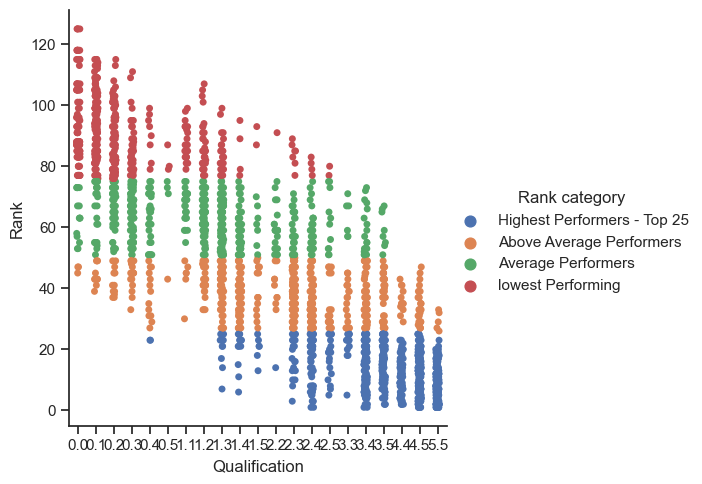

In [29]:
# Create a categorical plot in seaborn using the rank categories created above

sns.set(style="ticks")
g = sns.catplot(x="Qualification", y="Rank", hue="Rank category", data=sub)

It is intesting to see the one outliers of the top 25 performing poorly. Also to see the lowest performing still have some strong qualification rounds. I am curious if any of these stronger showings put them into the semifinal round.

In [30]:
# fig = g.get_figure()
g.savefig("out.png") 

#image will be saved in the working directory. 

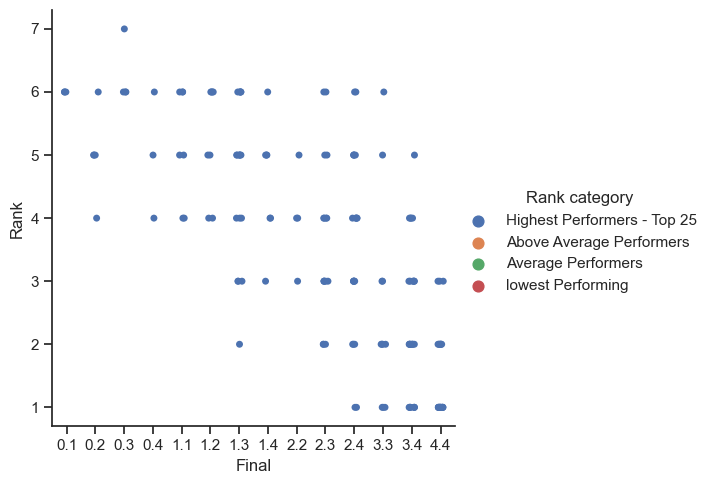

In [32]:
# Create a categorical plot in seaborn using the rank categories created above

sns.set(style="ticks")
g = sns.catplot(x="Final", y="Rank", hue="Rank category", data=sub)

# Revisit Questions

Questions answered: 
- How much does a competitors starting number align with competition rank? How often do climbers outside of the top 25 make finals? How often do climbers within the top 25 never make a final?
    - There is no alignment, however it appears that climbers that make the top 25 in some competitions will perform poorly in others. Because the top 25 is based on competition placement and not an overall ranking in the sport it is difficult to show those that break the rank.
    
Ones to look into further:
- Which country has the most climbers participating in the finals? Is this proportional to how many climbers they have participated in the competition compared to other countries? Is this consistent or vary from competition to competition? Year to year?
    - In order to utilize the visual relationships a new column must be derived to count the number of climbers from each country, or establish a numerical code for each country.
    - This can be answered without transforming data using other visualizations
- Which competitions are the most popular? Does this impact which climbers or countries make the finals?
    - In order to utilize the visual relationships I suggest a new column must be derived giving a numerical code for each competition
    - This can be answered without transforming data using other visualizations

# Visualizations for exploring relationships

<AxesSubplot:>

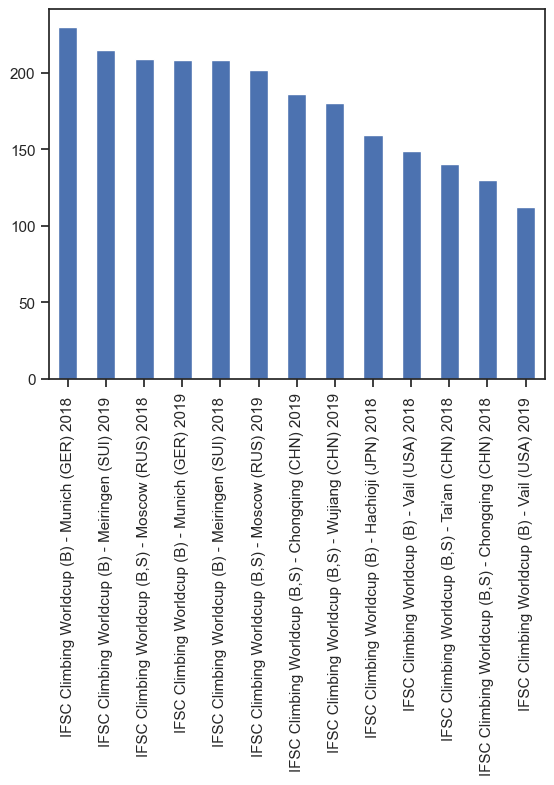

In [33]:
#bar chart to show competition popularity
boulder['Competition Title'].value_counts().plot.bar()

<AxesSubplot:>

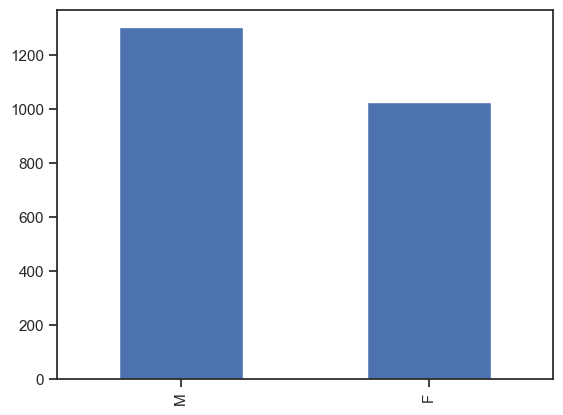

In [51]:
#bar chart to show gender comparison
boulder['Gender'].value_counts().plot.bar()

<AxesSubplot:>

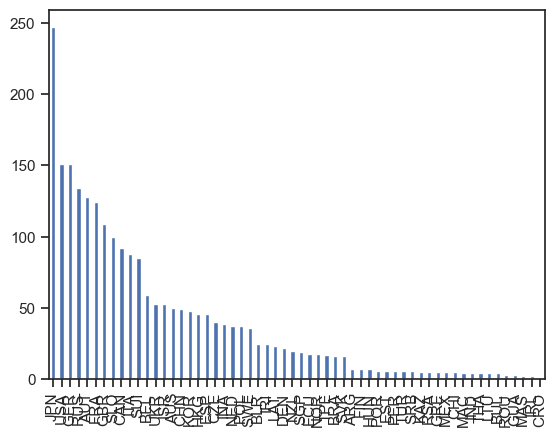

In [52]:
#bar chart to show count of atheletes from each country
boulder['Nation'].value_counts().plot.bar()

# Hypothesis

The 10 countries with the highest number of participants have the greatest number of atheletes make it to finals.

The competitions in Europe (the more highly attended competitions(6)) have more often different finalists than those that take place in Asia or the USA (the lower attended competitions(7)).